**Librerías**

In [1]:
#Básicas
import numpy as np
import pandas as pd
#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

**Lectura de datos**

In [2]:
#Carga de datos
df_airbnb = pd.read_csv("airbnb_for_tableau.csv", sep = ";", decimal = ",")
#Y visualizamos los primeros elementos
df_airbnb.head()

,ID,Host.Since,Neighbourhood.Group.Cleansed,City,Latitude,Longitude,Zipcode,Property.Type,Room.Type,Accommodates,...,Elevator in building,Family/kid friendly,Iron,Hair dryer,Air conditioning,Laptop friendly workspace,Smoke detector,Wheelchair accessible,Lock on bedroom door,Free parking on premises
0,16064297,2016-04-04,Centro,Madrid,40.424683,-3.695436,28004,Apartment,Entire home/apt,7,...,True,True,True,True,True,True,False,False,True,False
1,14495975,2016-08-08,Hortaleza,Madrid,40.453497,-3.613010,28042,Apartment,Entire home/apt,16,...,True,True,True,False,False,True,True,False,False,False
2,6394264,2015-04-27,Salamanca,Madrid,40.434258,-3.677497,28006,Apartment,Entire home/apt,5,...,True,True,True,True,True,True,False,False,False,False
3,2086594,2013-01-25,Retiro,Madrid,40.406981,-3.675551,28007,Apartment,Entire home/apt,8,...,True,True,True,False,False,False,False,True,False,True
4,13759991,2015-04-27,Salamanca,Madrid,40.435228,-3.684499,28006,Apartment,Entire home/apt,4,...,True,True,True,True,True,True,False,False,False,False


In [3]:
#Vemos el número de muestras y dimensiones de nuestro dataset
df_airbnb.shape

(12279, 35)

In [4]:
#Análisis general para outliers
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,12279.0,1.028578e+07,5.494440e+06,18628.000000,5.722384e+06,1.127186e+07,1.526295e+07,1.810984e+07
Latitude,12279.0,4.042051e+01,1.967719e-02,40.332908,4.041012e+01,4.041846e+01,4.042758e+01,4.051425e+01
Longitude,12279.0,-3.697358e+00,2.306473e-02,-3.835498,-3.707795e+00,-3.701693e+00,-3.694169e+00,-3.573613e+00
Zipcode,12279.0,2.802356e+04,2.335977e+03,28.000000,2.800500e+04,2.801200e+04,2.801600e+04,2.800130e+05
Accommodates,12279.0,3.193990e+00,1.949516e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,12279.0,1.249857e+00,5.844497e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,12279.0,1.293265e+00,8.300313e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
Beds,12279.0,1.960013e+00,1.444904e+00,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,1.600000e+01
Number.of.Reviews,12279.0,2.393061e+01,3.903907e+01,0.000000,1.000000e+00,8.000000e+00,2.900000e+01,4.460000e+02
Review.Scores.Rating,12279.0,9.166353e+01,7.841395e+00,20.000000,9.000000e+01,9.160293e+01,9.700000e+01,1.000000e+02


In [5]:
#Vemos información de nuestro datos
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            12279 non-null  int64  
 1   Host.Since                    12276 non-null  object 
 2   Neighbourhood.Group.Cleansed  12279 non-null  object 
 3   City                          12279 non-null  object 
 4   Latitude                      12279 non-null  float64
 5   Longitude                     12279 non-null  float64
 6   Zipcode                       12279 non-null  int64  
 7   Property.Type                 12279 non-null  object 
 8   Room.Type                     12279 non-null  object 
 9   Accommodates                  12279 non-null  int64  
 10  Bathrooms                     12279 non-null  float64
 11  Bedrooms                      12279 non-null  int64  
 12  Beds                          12279 non-null  int64  
 13  N

In [6]:
#Cambio de nombre variables que necesito (da problemas con las q llevan .)
df_airbnb.rename(columns={"precio.total":"precio_total",
                        "Neighbourhood.Group.Cleansed": "Neighbourhood_Group_Cleansed", "Property.Type": "Property_Type"},
                           inplace=True)

**HiSTOGRAMAS**

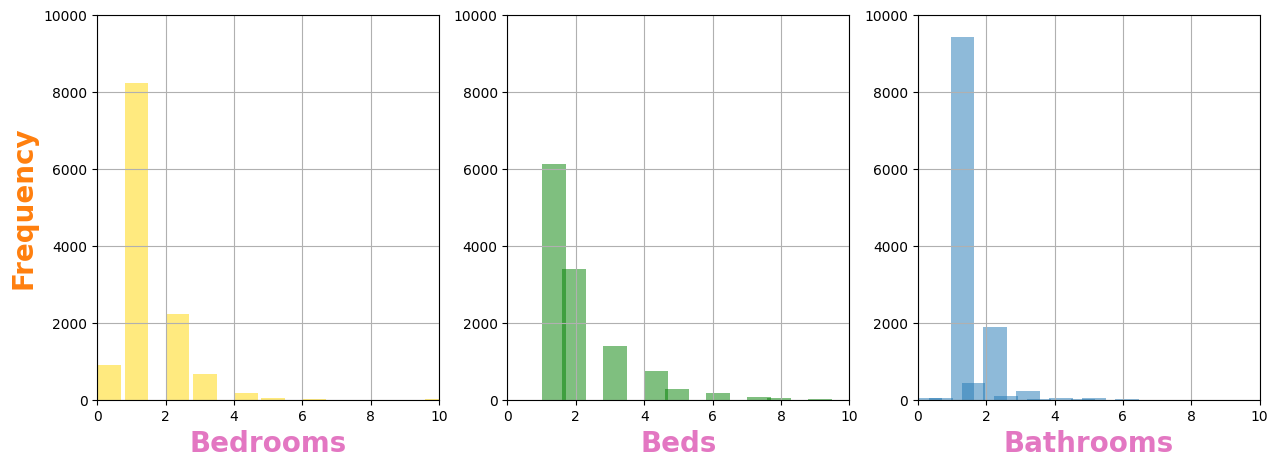

In [7]:
#Frecuencia con la que se repite el número de habitaciones, camas y baños en nuestros registros
plt.figure(figsize=(15, 5))

font = {'color':'tab:pink','fontweight':'bold', 'size':20}

plt.subplot(1,3,1)
df_airbnb["Bedrooms"].plot.hist(alpha=0.5, bins=25, grid = True, facecolor="Gold", width=0.7)
plt.axis([0, 10, 0, 10000])
plt.ylabel("Frequency", fontdict = {'color':'tab:orange','fontweight':'bold','size':20})
plt.xlabel("Bedrooms", fontdict = font)

plt.subplot(1,3,2)
df_airbnb["Beds"].plot.hist(alpha=0.5, bins=25, grid = True, facecolor="Green", width=0.7)
plt.axis([0, 10, 0, 10000])
plt.ylabel("")
plt.xlabel("Beds", fontdict = font)

plt.subplot(1,3,3)
df_airbnb["Bathrooms"].plot.hist(histtype="bar", alpha=0.5, bins=25, grid = True, width=0.7)
plt.axis([0, 10, 0, 10000])
plt.ylabel("")
plt.xlabel("Bathrooms", fontdict = font)

plt.show()

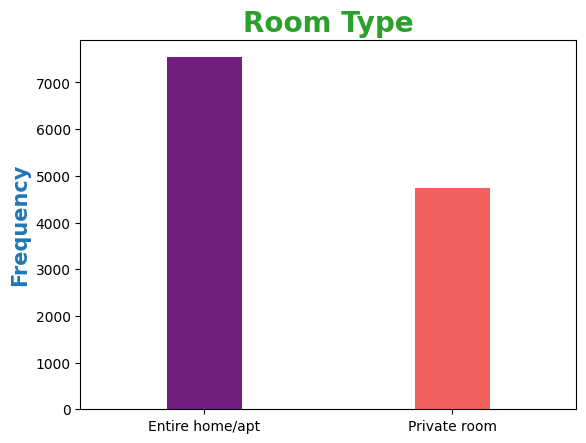

In [8]:
# Frecuencia con la que se repite cada tipo de habitación
c = sns.countplot(data=df_airbnb, x="Room.Type", palette="magma", saturation=1, width=0.3)

plt.title("Room Type", fontdict = {'color':'tab:green','fontweight':'bold','size':20})
c.set_ylabel("Frequency", fontdict = {'color':'tab:blue','fontweight':'bold', 'size':15})
c.set_xlabel("")

plt.show()

***

In [9]:
#Vemos cantidades de muestra por distrito
df_airbnb["Neighbourhood_Group_Cleansed"].value_counts()

Centro                   6411
Chamberí                  890
Salamanca                 797
Arganzuela                737
Tetuán                    421
Retiro                    388
Moncloa - Aravaca         373
Latina                    354
Chamartín                 326
Carabanchel               319
Ciudad Lineal             277
Puente de Vallecas        189
Hortaleza                 169
Usera                     133
Fuencarral - El Pardo     125
San Blas - Canillejas     100
Barajas                    72
Moratalaz                  67
Villaverde                 62
Villa de Vallecas          38
Vicálvaro                  31
Name: Neighbourhood_Group_Cleansed, dtype: int64

**Otros tipos de gráficos: pie chart, bar chart, scatter plot**

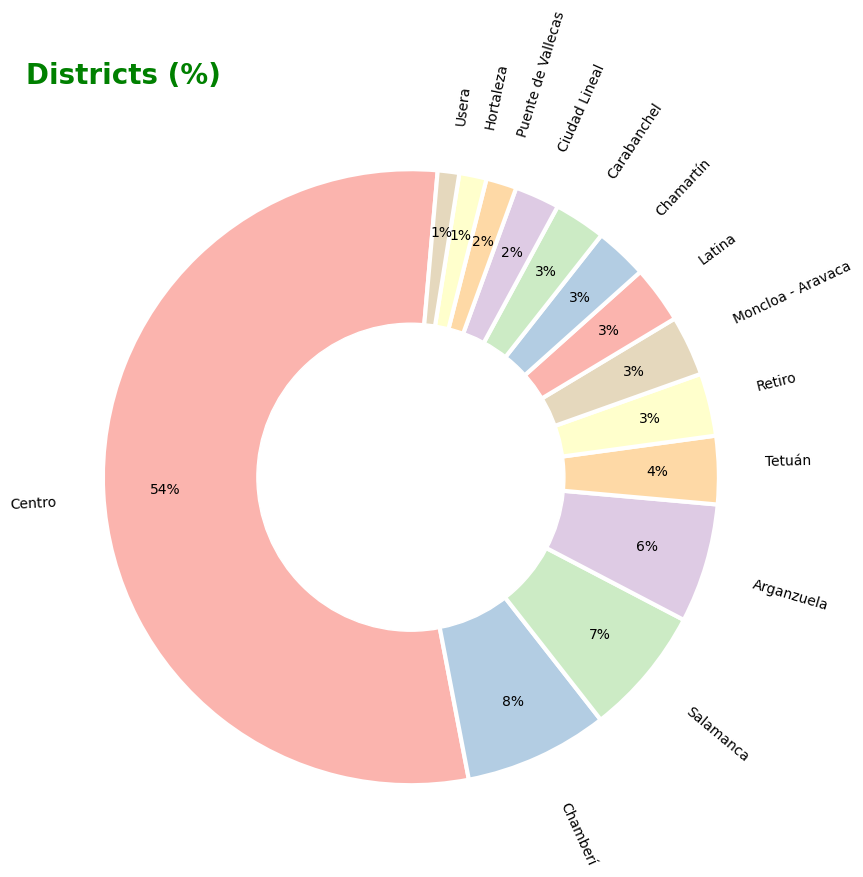

In [10]:
from palettable.colorbrewer.qualitative import Pastel1_7

#Top 14 de los distritos con mayor presencia(porcentaje) en el df, los 7 que no se consideran en este gráfico, 
#tienen valores inferiores a 1%(en el conteo total)

fig = plt.figure(figsize=(10,10))

df_airbnb["Neighbourhood_Group_Cleansed"].value_counts().head(14).plot.pie(
                                                                    labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                                                                    pctdistance=0.8, autopct='%1.0f%%', startangle=85, rotatelabels=True,
                                                                    colors=Pastel1_7.hex_colors)

# Agregamos un círculo en el medio para transformalo en una Dona
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Districts (%)", fontdict = {'color':'green', 'fontweight':'bold', 'size':20}, loc = 'left')
plt.ylabel("")                                               

plt.show()

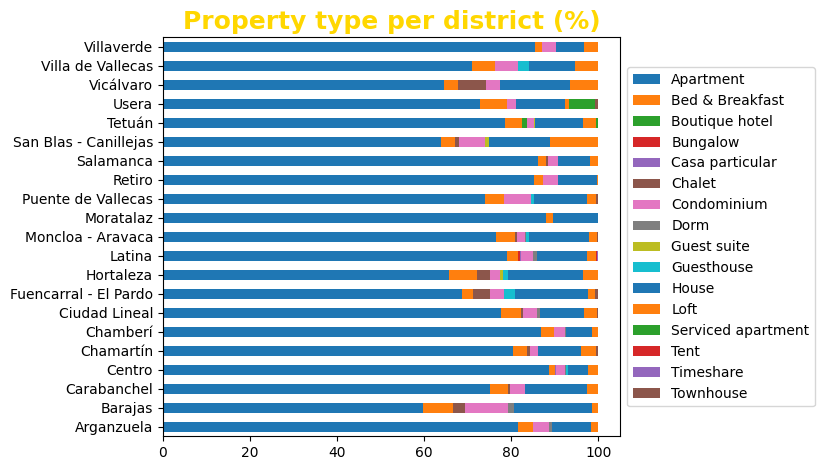

In [11]:
# Agrupamos el df por distritos y contamos la frecuencia de cada tipo de propiedad, lo presentamos en porcentaje
fig, ax = plt.subplots()

(df_airbnb.groupby("Neighbourhood_Group_Cleansed").Property_Type.value_counts(normalize = True)*100) \
                             .unstack().plot(kind = 'barh', stacked = True, ax = ax)

ax.set_title('Property type per district (%)', loc = "center", fontdict = {'color':'gold','fontweight':'bold', 'size':18})
ax.set_ylabel('')
#Posición y extensión del gráfico
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.1, box.height])

# Leyenda fuera del área del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()

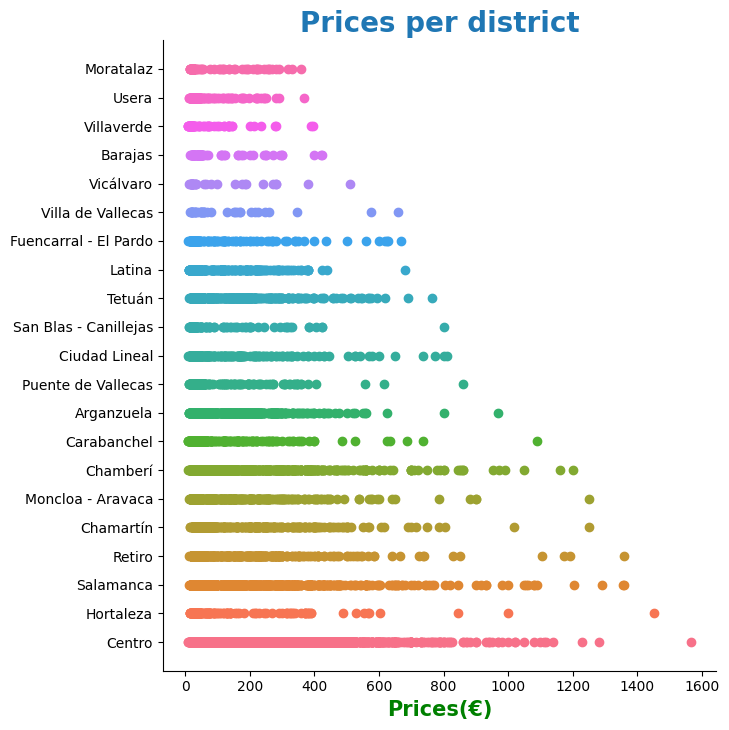

In [12]:
#Correlación distrito con precio_total

sns.FacetGrid(df_airbnb, hue="Neighbourhood_Group_Cleansed", height = 7.4) \
                     .map(plt.scatter, "precio_total", "Neighbourhood_Group_Cleansed")

plt.title("Prices per district", fontdict = {'color':'tab:blue','fontweight':'bold','size':20})
plt.xlabel("Prices(€)", fontdict = {'color':'green', 'fontweight':'bold', 'size':15})
plt.ylabel("") 
plt.tight_layout()

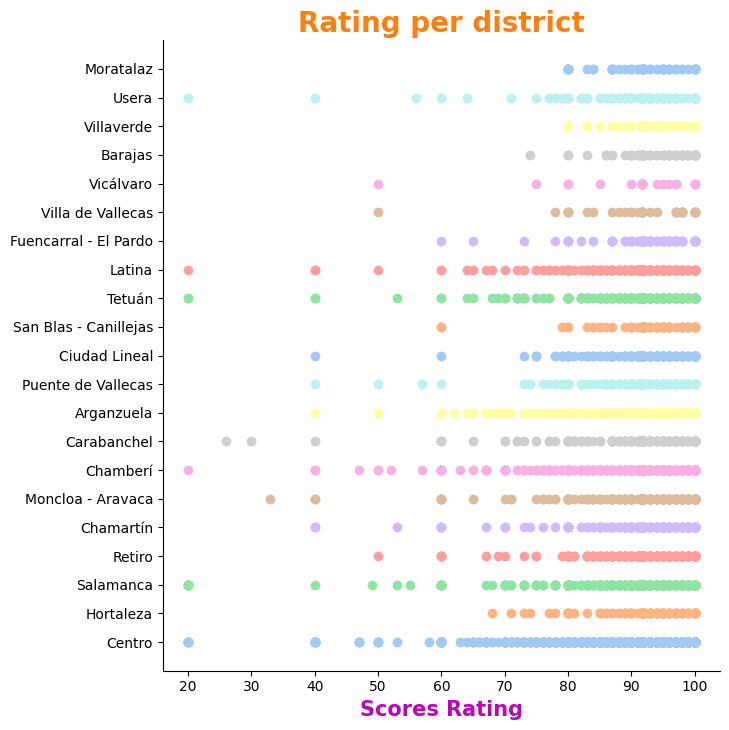

In [13]:
#Correlación distrito con calificación

sns.FacetGrid(df_airbnb, hue="Neighbourhood_Group_Cleansed", height = 7.4, palette="pastel") \
                     .map(plt.scatter, "Review.Scores.Rating", "Neighbourhood_Group_Cleansed")

plt.title("Rating per district", fontdict = {'color':'tab:orange','fontweight':'bold','size':20})
plt.xlabel("Scores Rating", fontdict = {'color':'m', 'fontweight':'bold', 'size':15})
plt.ylabel("") 
plt.tight_layout()

***

C:\Users\ANA\AppData\Local\Temp\ipykernel_5968\190524622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(df_airbnb.drop(["precio_total"], axis=1).corr())
C:\Users\ANA\AppData\Local\Temp\ipykernel_5968\190524622.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


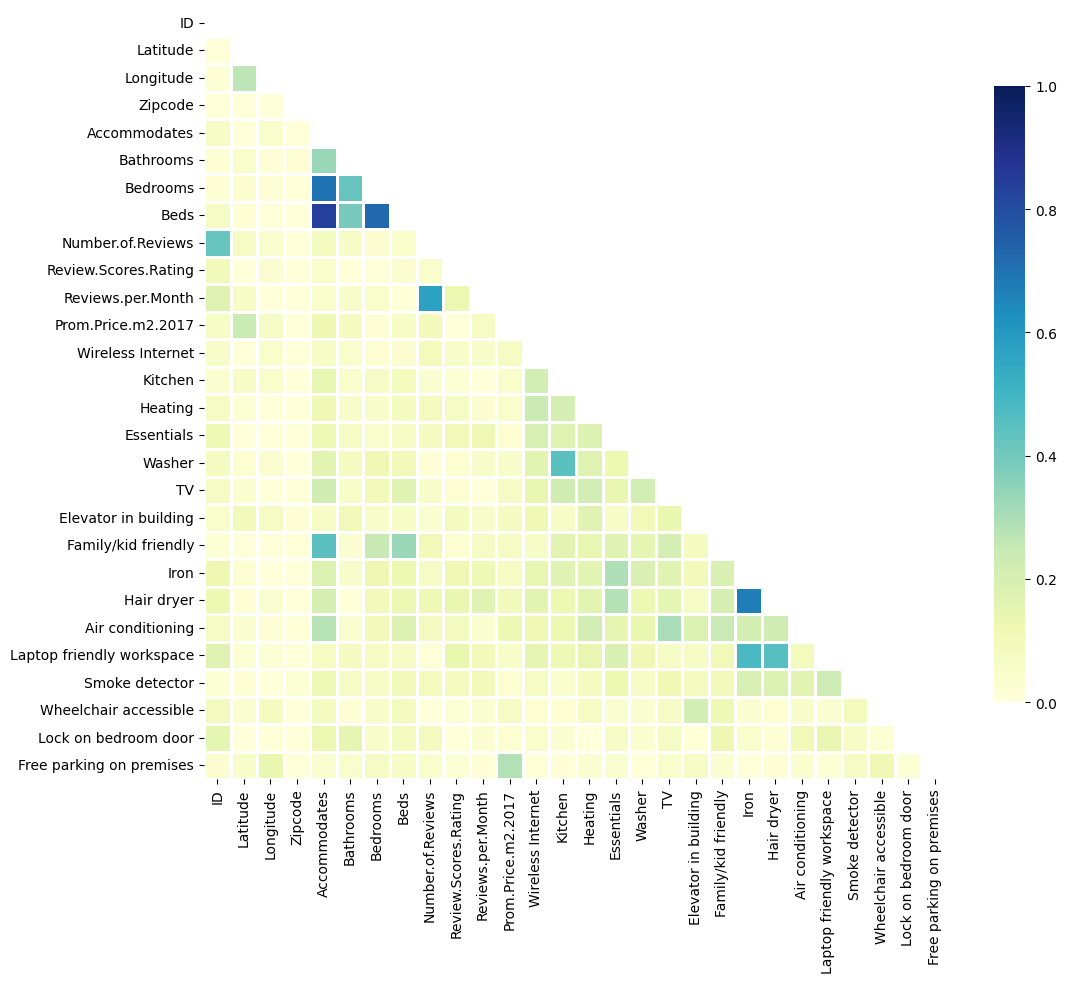

In [14]:
#Correlación de todas las variables númericas con respecto al precio_total
corr = np.abs(df_airbnb.drop(["precio_total"], axis=1).corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,10))

sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
                     linewidths=1, cmap="YlGnBu", cbar_kws={"shrink" : .8})

plt.show()